## Import Packages

In [41]:
import plotly.graph_objs as pgo
import matplotlib.pyplot as pp
import numpy as np
import pandas as pd

from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import recall_score

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as pgo
import plotly.tools as tls

## Parse Data

In [2]:
# Parse training and test into data and labels
X_trO = pd.read_csv("trainEmployeeData.csv")
Y_tr = X_trO[['Attrition']]
X_tr = X_trO.drop(['Attrition','Unnamed: 0'], 1)
X_tr = X_tr.drop(['Over18'], axis=1)

X_testO = pd.read_csv("testEmployeeData.csv")
Y_test = X_testO[['Attrition', 'Unnamed: 0']]
X_test = X_testO.drop(['Attrition','Unnamed: 0'], 1)
X_test = X_test.drop(['Over18'], axis=1)

In [3]:
X_tr.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,42,Travel_Rarely,201,Research & Development,1,4,Life Sciences,1,517,2,...,2,80,1,8,5,3,5,2,1,2
1,32,Travel_Rarely,128,Research & Development,2,1,Technical Degree,1,362,4,...,4,80,0,9,5,3,6,2,0,4
2,48,Travel_Rarely,715,Research & Development,1,3,Life Sciences,1,1263,4,...,3,80,0,25,3,4,1,0,0,0
3,51,Travel_Rarely,432,Research & Development,9,4,Life Sciences,1,116,4,...,2,80,2,10,4,3,4,2,0,3
4,29,Travel_Rarely,726,Research & Development,29,1,Life Sciences,1,1859,4,...,4,80,2,11,3,3,7,0,1,6


In [4]:
Y_tr.head()

,Attrition
0,No
1,No
2,No
3,No
4,No


## Data Cleaning

In [5]:
# Check for any null values
total_data = pd.concat([X_trO,X_testO]).drop('Unnamed: 0', 1)
X_tr.isnull().any()

Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany

In [6]:
# We see no invalid data based off summary statistics
total_data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [7]:
def transformTrainData(data):
    categorical = []
    for col, value in data.iteritems():
        if value.dtype == 'object':
            categorical.append(col)
    numerical = data.columns.difference(categorical)
    data_cat = data[categorical]
    data_cat = pd.get_dummies(data_cat)
    data_num = data[numerical]
    return pd.concat([data_num, data_cat], axis=1)

def transformTestData(data):
    return data["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

tran_X_tr = transformTrainData(X_tr)
tran_X_test = transformTrainData(X_test)

tran_Y_tr = transformTestData(Y_tr)
tran_Y_test = transformTestData(Y_test)

tran_X_tr.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,42,201,1,4,1,517,2,95,3,1,...,0,0,0,0,0,1,0,0,1,0
1,32,128,2,1,1,362,4,84,2,2,...,0,0,0,0,0,0,0,1,1,0
2,48,715,1,3,1,1263,4,76,2,5,...,0,1,0,0,0,0,0,1,1,0
3,51,432,9,4,1,116,4,96,3,1,...,0,0,0,0,0,0,1,0,1,0
4,29,726,29,1,1,1859,4,93,1,2,...,0,0,0,0,0,1,0,0,1,0


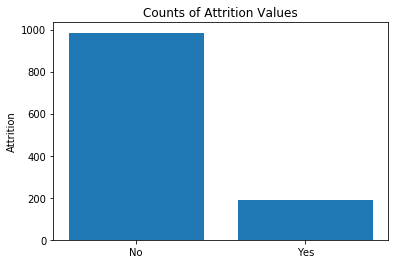

0    985
1    191
Name: Attrition, dtype: int64

In [10]:
no, yes = tran_Y_tr.value_counts()

x = np.arange(2)
money = [no, yes]


fig, ax = pp.subplots()
pp.bar(x, money)
pp.xticks(x, ('No', 'Yes'))
pp.ylabel('Attrition')
pp.title('Counts of Attrition Values')
pp.savefig("data_viz/attrition_imbalance.png")
pp.show()

tran_Y_tr.value_counts()

## Balance Labels in Dataset

In [26]:
sm = SMOTE(random_state=0)
smote_tran_X_tr, smote_tran_Y_tr = sm.fit_sample(tran_X_tr,tran_Y_tr)

### Save augmented SMOTE training data

In [ ]:
# np.savetxt('SMOTE_trainingX.csv', smote_tran_X_tr,delimiter=",")
# np.savetxt('SMOTE_trainingY.csv', smote_tran_Y_tr,delimiter=",")

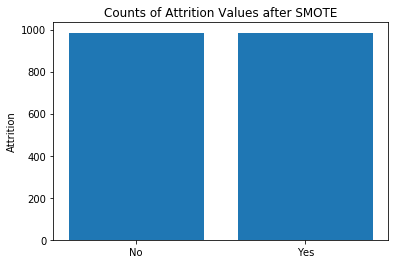

In [14]:
yes = np.count_nonzero(smote_tran_Y_tr == 1)
no = np.count_nonzero(smote_tran_Y_tr == 0)


x = np.arange(2)
money = [no, yes]


fig, ax = pp.subplots()
pp.bar(x, money)
pp.xticks(x, ('No', 'Yes'))
pp.ylabel('Attrition')
pp.title('Counts of Attrition Values after SMOTE')
pp.savefig("data_viz/SMOTE_balance_attrition.png")

pp.show()

## Random Forest Model

### Grid Search for Optimal Hyperparameter

In [8]:
param_grid = [
  {
      'n_estimators': [10, 20, 40, 80, 160], 
      'max_depth': [10, 20, 30, 40, 50, 55], 
      'max_features': ['sqrt', 'log2', 10]
  }
]

rfc = RandomForestClassifier(n_jobs=-1) 
CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 5, verbose = 1)

CV_rfc.fit(tran_X_tr, tran_Y_tr)

opt_parameters = CV_rfc.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  2.2min finished


In [58]:
param_grid = [
  {
      'n_estimators': [10, 20, 40, 80, 160], 
      'max_depth': [10, 20, 30, 40, 50, 55], 
      'max_features': ['sqrt', 'log2', 10]
  }
]

sm_rfc = RandomForestClassifier(n_jobs=-1) 
CV_sm_rfc = GridSearchCV(estimator = sm_rfc, param_grid = param_grid, cv = 5, verbose = 1)

CV_sm_rfc.fit(smote_tran_X_tr, smote_tran_Y_tr)

sm_opt_parameters = CV_sm_rfc.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  2.4min finished


In [15]:
opt_parameters = {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 20}

In [16]:
sm_opt_parameters = {'max_depth': 55, 'max_features': 'log2', 'n_estimators': 160}

In [17]:
# dir(CV_rfc)

In [45]:
pd.DataFrame(CV_sm_rfc.grid_scores_)

NameError: name 'CV_sm_rfc' is not defined

### Rerun RF Model on Optimal Parameters 

In [55]:
rfc = RandomForestClassifier(max_depth = opt_parameters["max_depth"]
                        ,max_features = opt_parameters['max_features']
                        ,n_estimators = opt_parameters['n_estimators']
                        ,n_jobs = -1)

rfc_fit = rfc.fit(tran_X_tr,tran_Y_tr)
rfc_preds = rfc_fit.predict(tran_X_test)

print("Training accuracy: ", rfc_fit.score(tran_X_tr, tran_Y_tr))
print("Test accuracy: ", rfc_fit.score(tran_X_test, tran_Y_test))
print("Recall Score: ", recall_score(tran_Y_test,rfc_preds))

Training accuracy:  0.975340136054
Test accuracy:  0.860544217687
Recall Score:  0.152173913043


In [59]:
sm_rfc = RandomForestClassifier(max_depth = sm_opt_parameters["max_depth"]
                        ,max_features = sm_opt_parameters['max_features']
                        ,n_estimators = sm_opt_parameters['n_estimators']
                        ,n_jobs = -1)

sm_rfc_fit = sm_rfc.fit(smote_tran_X_tr, smote_tran_Y_tr)
sm_rfc_fit_preds = sm_rfc_fit.predict(tran_X_test)


print("Training accuracy: ", sm_rfc_fit.score(smote_tran_X_tr, smote_tran_Y_tr))
print("Test accuracy: ", sm_rfc_fit.score(tran_X_test, tran_Y_test))
print("Recall Score: ", recall_score(tran_Y_test, sm_rfc_fit_preds))

Training accuracy:  1.0
Test accuracy:  0.87074829932
Recall Score:  0.260869565217


## Telescopic Search - Fine Grain Search

In [38]:
param_grid_fine = [
  {
      'n_estimators': [150, 155, 160,165], 
      'max_depth': [51, 52, 53, 54, 55], 
      'max_features': ['sqrt', 'log2',10]
  }
]

sm_rfc = RandomForestClassifier(n_jobs=-1) 
CV_sm_rfc_fine = GridSearchCV(estimator = sm_rfc, param_grid = param_grid_fine, cv = 5, verbose = 1)

CV_sm_rfc_fine.fit(smote_tran_X_tr, smote_tran_Y_tr)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  3.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'max_features': ['sqrt', 'log2', 10], 'n_estimators': [150, 155, 160, 165], 'max_depth': [51, 52, 53, 54, 55]}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [39]:
sm_opt_parameters_fine = CV_sm_rfc_fine.best_params_
CV_sm_rfc_fine.best_params_

{'max_depth': 51, 'max_features': 'log2', 'n_estimators': 160}

In [62]:
sm_rfc_fine = RandomForestClassifier(max_depth = sm_opt_parameters_fine["max_depth"]
                        ,max_features = sm_opt_parameters_fine['max_features']
                        ,n_estimators = sm_opt_parameters_fine['n_estimators']
                        ,n_jobs = -1)

sm_rfc_fine_fit = sm_rfc_fine.fit(smote_tran_X_tr, smote_tran_Y_tr)
sm_rfc_fine_fit_preds = sm_rfc_fine_fit.predict(tran_X_test)


print("Training accuracy: ", sm_rfc_fine_fit.score(smote_tran_X_tr, smote_tran_Y_tr))
print("Test accuracy: ", sm_rfc_fine_fit.score(tran_X_test, tran_Y_test))
print("Recall Score: ", recall_score(tran_Y_test, sm_rfc_fine_fit_preds))

Training accuracy:  1.0
Test accuracy:  0.877551020408
Recall Score:  0.260869565217


In [34]:
pd.DataFrame(CV_sm_rfc_fine.grid_scores_)

,parameters,mean_validation_score,cv_validation_scores
0,"{'n_estimators': 150, 'max_features': 'sqrt', ...",0.915736,"[0.662436548223, 0.979695431472, 0.97969543147..."
1,"{'n_estimators': 155, 'max_features': 'sqrt', ...",0.917259,"[0.672588832487, 0.979695431472, 0.97208121827..."
2,"{'n_estimators': 160, 'max_features': 'sqrt', ...",0.915736,"[0.675126903553, 0.979695431472, 0.97715736040..."
3,"{'n_estimators': 165, 'max_features': 'sqrt', ...",0.915736,"[0.667512690355, 0.977157360406, 0.97461928934..."
4,"{'n_estimators': 150, 'max_features': 'log2', ...",0.912690,"[0.639593908629, 0.984771573604, 0.97969543147..."
5,"{'n_estimators': 155, 'max_features': 'log2', ...",0.917259,"[0.652284263959, 0.98730964467, 0.982233502538..."
6,"{'n_estimators': 160, 'max_features': 'log2', ...",0.913198,"[0.637055837563, 0.989847715736, 0.98223350253..."
7,"{'n_estimators': 165, 'max_features': 'log2', ...",0.912690,"[0.649746192893, 0.98730964467, 0.979695431472..."
8,"{'n_estimators': 150, 'max_features': 'sqrt', ...",0.914213,"[0.657360406091, 0.982233502538, 0.97208121827..."
9,"{'n_estimators': 155, 'max_features': 'sqrt', ...",0.913706,"[0.659898477157, 0.979695431472, 0.97208121827..."


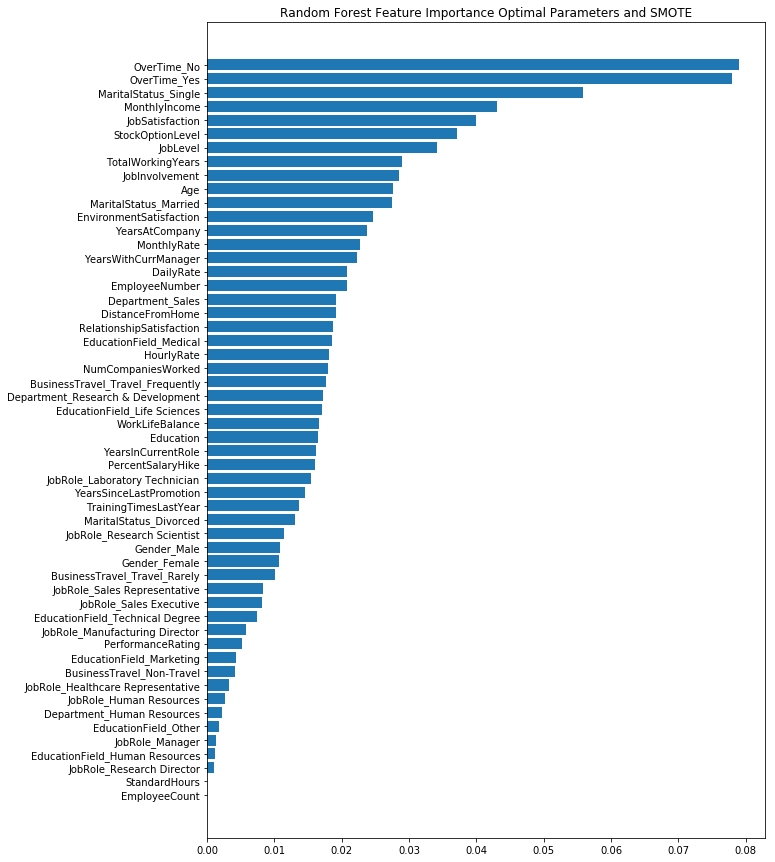

In [68]:
pp.figure(figsize = (10,15))
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    n = len(names)
    pp.barh(range(n), imp, align='center')
    pp.title("Random Forest Feature Importance Optimal Parameters and SMOTE")
    pp.yticks(range(len(names)), names)
    pp.savefig("data_viz/Fine_grain_ft_import_SMOTE.png")
    pp.show()

features_names = tran_X_tr.columns.values
f_importances(sm_rfc_fine.feature_importances_, features_names)

In [74]:
for name, importance in zip(list(tran_X_tr.columns.values), sm_rfc_fine.feature_importances_):
    print(name, "=", importance)

Age = 0.0275722636357
DailyRate = 0.0207913612164
DistanceFromHome = 0.0191194716865
Education = 0.0165439561848
EmployeeCount = 0.0
EmployeeNumber = 0.0207550191842
EnvironmentSatisfaction = 0.0246001874204
HourlyRate = 0.0180515787285
JobInvolvement = 0.0285721349789
JobLevel = 0.0342008294506
JobSatisfaction = 0.0400197213441
MonthlyIncome = 0.0430905524373
MonthlyRate = 0.0227439108021
NumCompaniesWorked = 0.0179126370416
PercentSalaryHike = 0.0159845565736
PerformanceRating = 0.0052063559012
RelationshipSatisfaction = 0.0187571248403
StandardHours = 0.0
StockOptionLevel = 0.0371668814037
TotalWorkingYears = 0.0289609617786
TrainingTimesLastYear = 0.0136035316608
WorkLifeBalance = 0.0166245187887
YearsAtCompany = 0.0236843499596
YearsInCurrentRole = 0.0162437236016
YearsSinceLastPromotion = 0.014595174871
YearsWithCurrManager = 0.0222412464314
BusinessTravel_Non-Travel = 0.00418604227829
BusinessTravel_Travel_Frequently = 0.0176265800387
BusinessTravel_Travel_Rarely = 0.01001638785

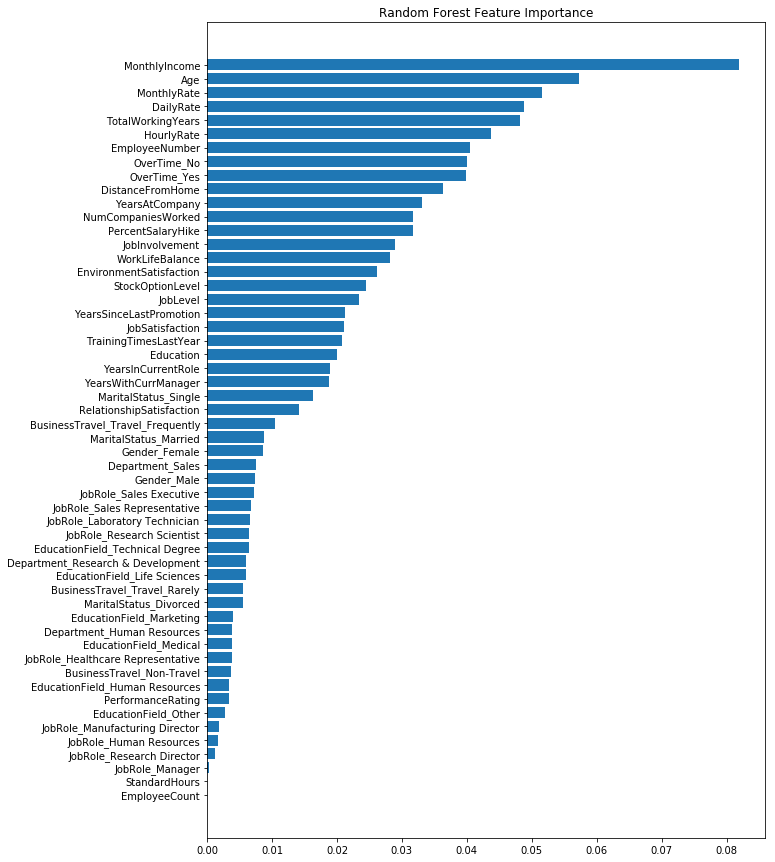

In [69]:
pp.figure(figsize = (10,15))
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    n = len(names)
    pp.title("Random Forest Feature Importance")
    pp.barh(range(n), imp, align='center')
    pp.yticks(range(len(names)), names)
    pp.savefig("data_viz/ft_import.png")
    pp.show()

features_names = tran_X_tr.columns.values
f_importances(rfc.feature_importances_, features_names)

In [ ]:
for name, importance in zip(list(tran_X_tr.columns.values), rfc.feature_importances_):
    print(name, "=", importance)

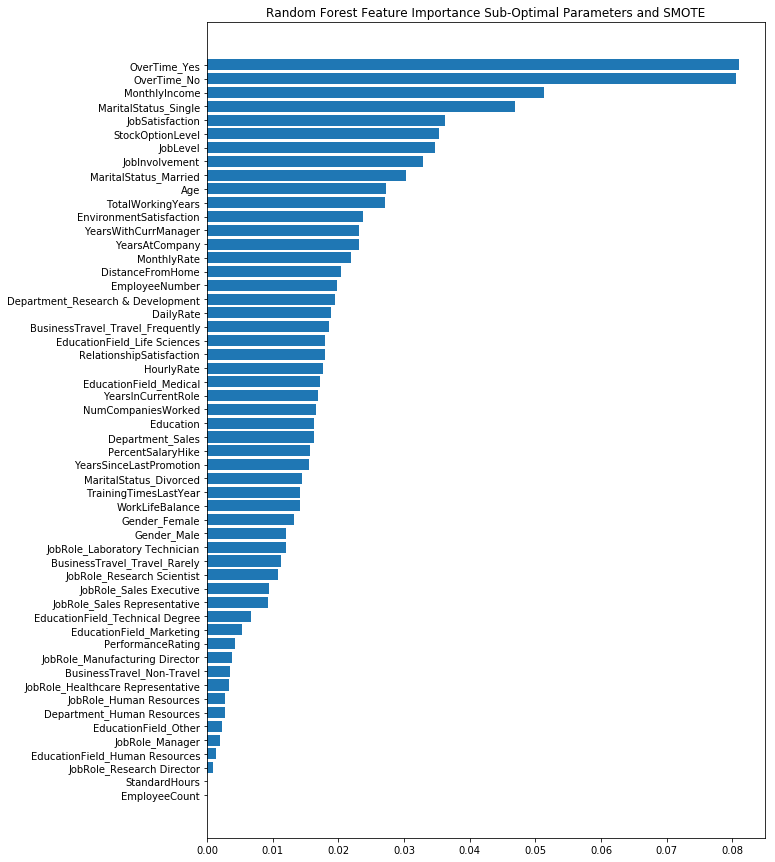

In [70]:
#SMOTE
pp.figure(figsize = (10,15))
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    n = len(names)
    pp.barh(range(n), imp, align='center')
    pp.yticks(range(len(names)), names)
    pp.title("Random Forest Feature Importance Sub-Optimal Parameters and SMOTE")
    pp.savefig("data_viz/ft_import_SMOTE.png")
    pp.show()

features_names = tran_X_tr.columns.values
f_importances(sm_rfc.feature_importances_, features_names)

In [73]:
# Scatter plot 
trace = pgo.Scatter(
    y = sm_rfc_fine.feature_importances_,
    x = features_names,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 11,
        color = sm_rfc_fine.feature_importances_,
        colorscale='Viridis',
        showscale=True
    ),
    text = features_names
)
data = [trace]

layout = pgo.Layout(
    autosize= True,
    title= 'Feature Importance of Random Forest with SMOTE',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    margin=pgo.Margin(
        l=50,
        r=50,
        b=250,
        t=100,
        pad=0
    ),
    yaxis=dict(
        title= 'Importance Score',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 3
    ),
    showlegend= False
)
fig = pgo.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')
